In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


In [3]:
# read in the data
df = pd.read_csv('DataFiles/ImportantFeatures.csv')

# split the data into training and test sets
X = df.drop('DTP', axis=1)
y = df['DTP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
def create_MLP():
    model = Sequential()
    model.add(Dense(64, input_dim=59, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [7]:
model = create_MLP()
history = model.fit(X_train, y_train, batch_size = 32, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8821 - val_loss: 0.2928 - val_accuracy: 0.8974
Epoch 2/25
148/148 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.9162 - val_loss: 0.2829 - val_accuracy: 0.8965
Epoch 3/25
148/148 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9168 - val_loss: 0.2821 - val_accuracy: 0.8982
Epoch 4/25
148/148 [==============================] - 0s 1ms/step - loss: 0.2238 - accuracy: 0.9164 - val_loss: 0.2839 - val_accuracy: 0.8991
Epoch 5/25
148/148 [==============================] - 0s 1ms/step - loss: 0.2145 - accuracy: 0.9166 - val_loss: 0.2859 - val_accuracy: 0.8974
Epoch 6/25
148/148 [==============================] - 0s 1ms/step - loss: 0.2074 - accuracy: 0.9192 - val_loss: 0.2891 - val_accuracy: 0.8982
Epoch 7/25
148/148 [==============================] - 0s 1ms/step - loss: 0.1994 - accuracy: 0.9211 - val_loss: 0.2957 - val_accuracy: 0.8965
Epoch 

In [8]:
import matplotlib.pyplot as plt 

def plot_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

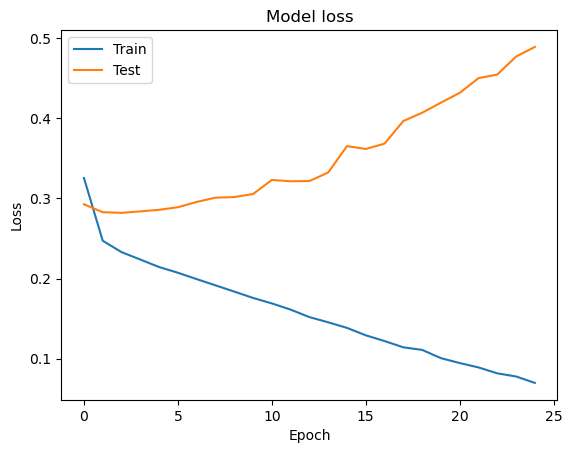

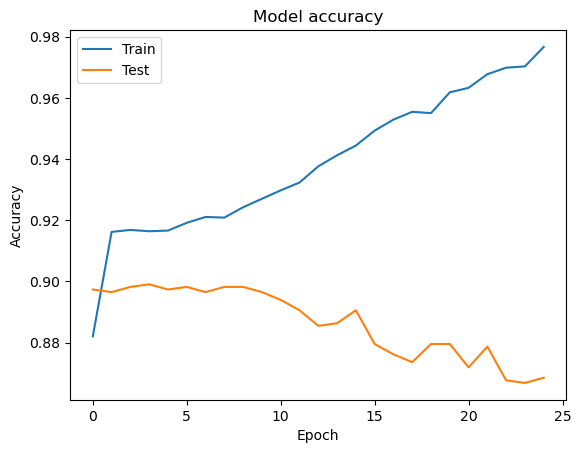

In [9]:
plot_history(history)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

37/37 [==============================] - 0s 666us/step


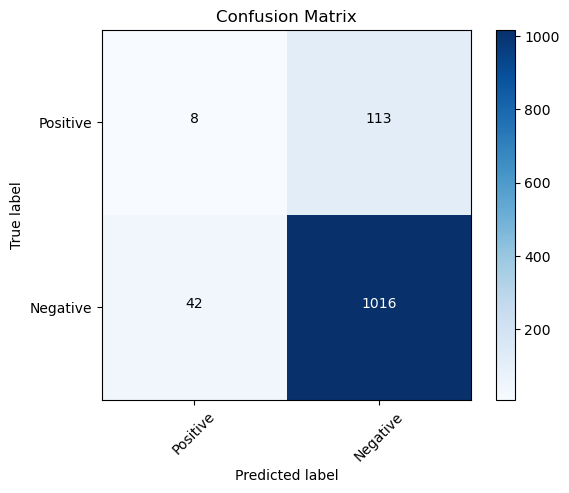

In [12]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add the labels for each quadrant
classes = ['Positive', 'Negative']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add the values for each quadrant
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()